**Assignment 1**
**CSCN8000 Artificial Intelligence Algorithms and Mathematics**

#### PRAMOD KUNJUKUNJU SAJI - 8856432

1.	Given the symptoms exhibited in a patient and a database of anonymized patient records, predict whether the patient is likely to have an illness (Parkinson’s disease).
    A model of this decision problem could be used by a program to provide decision support to medical professionals.
  	
   You can follow the following steps :
  	
   •	Data Analysis
  	
   •	Data Preprocessing
  	
   •	Data Standardization
  	
   •	Model Training
  	
   •	Measure your model’s accuracy.
  	
      a.	Use 80% of samples as training data size.

   •	Build a predictive system to verify that the model built is able to predict the patient’s Parkinson’s disease with one instance of the dataset.

   You can download the Dataset from: https://archive.ics.uci.edu/dataset/470/parkinson+s+disease+classification  

In [114]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

#### Data Analysis

In [115]:
# Read the data
df = pd.read_csv('pd_speech_features.csv', header=1)

# Preview the data
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [116]:
# Summary of the data frame
df.info()

# Descriptive statistics of the data frame
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


#### Data Preprocessing

In [117]:
# Checking for null values
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [118]:
# Dropping the id column
df.drop(columns=['id'], inplace=True)

In [119]:
# Checking for duplicates
df.duplicated().sum()

1

We have one duplicate record in the dataframe.

In [120]:
# Removing duplicates
df = df.drop_duplicates()

In [121]:
# Checking for duplicates
df.duplicated().sum()

0

The duplicate data is removed.

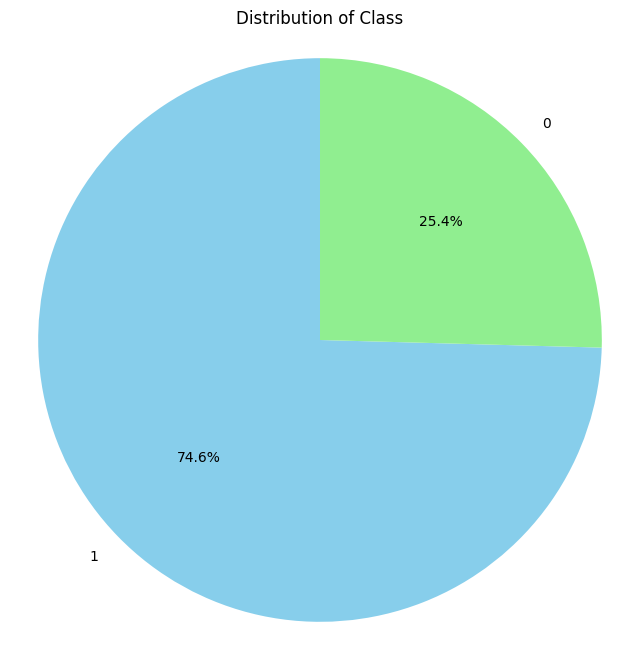

In [122]:
# Count the number of occurrences of each class
class_counts = df['class'].value_counts()

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Colors for the pie chart slices
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Plot the pie chart
ax.pie(class_counts, labels=class_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that the pie chart is drawn as a circle.
ax.axis('equal')

# Set the title
plt.title('Distribution of Class')

# Show the plot
plt.show()

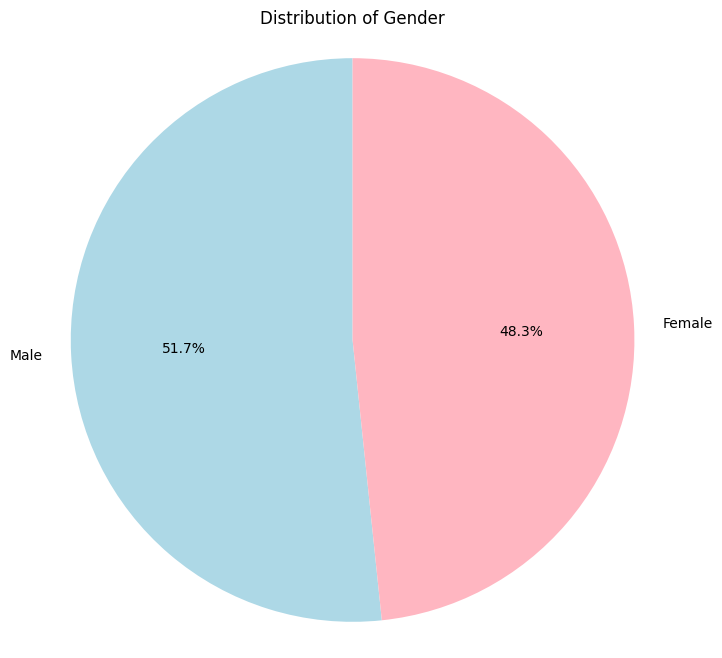

In [123]:
# Count the number of occurrences of each gender
gender_counts = df['gender'].value_counts()

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Colors for the pie chart slices
colors = ['lightblue', 'lightpink']

# Plot the pie chart
ax.pie(gender_counts, labels=['Male', 'Female'], colors=colors, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that the pie chart is drawn as a circle.
ax.axis('equal')

# Set the title
plt.title('Distribution of Gender')

# Show the plot
plt.show()

#### Data Standardization

In [124]:
# Split the data into features (X) and the target variable (y)
X = df.drop(columns=['class'])
y = df['class']

In [125]:
# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the data to the scaler object
X_scaled = scaler.fit_transform(X)

#### Model Training

In [126]:
# Split the data into training(80%) and testing(20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

In [127]:
# Create an instance of the Logistic Regression model
model = LogisticRegression(random_state=123)

# Train the logistic regression model on the training data
model.fit(X_train, y_train)

/Users/pramodsaji/Desktop/Applied Artificial Intelligence & Machine Learning/Machine-Learning-Programming/Lab/Untitled/CSCN8010/venv/CSCN8010_classic_ml1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=123)

#### Measure your model’s accuracy

In [128]:
# Get predictions for the test set
y_pred = model.predict(X_test)

# Calculate and print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", accuracy * 100, "%")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy:  85.43046357615894 %

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.58      0.63        33
           1       0.89      0.93      0.91       118

    accuracy                           0.85       151
   macro avg       0.80      0.75      0.77       151
weighted avg       0.85      0.85      0.85       151


Confusion Matrix:
[[ 19  14]
 [  8 110]]


#### • Build a predictive system to verify that the model built is able to predict the patient’s Parkinson’s disease with one instance of the dataset.

In [129]:
# Get a random index from the test set
rIndex = np.random.randint(0, X_test.shape[0])

# Predict the label of the random instance
result = model.predict(X_test[rIndex, :].reshape(1, -1))

# Print the result
if result == 0:
    print("The prediction indicates that the subject does not have Parkinson's disease.")
else:
    print("The prediction suggests that the subject has Parkinson's disease.")

The prediction indicates that the subject does not have Parkinson's disease.
